In [1]:
#Conclusions and Analysis

# 1. For mice treated with Capomulin, there is a strong correlation between weight and tumor volume. As The weight of the 
# mouse increases, so too does the tumor volume. 

# 2. Given that a near equal percentage of male and female (biological sex) mice were evaluated, the results of the study 
# are not restricted to one biological sex and can be applied to the two present. 

# 3. For the four most promising drugs in the study, there were no outliers present that swayed the analysis which 
# indicates a strong consistency in their results. 


# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_data

# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
#Reviewing the data for repeated time points and identifying their location 
# -- Include in README analysis
# ref: https://stackoverflow.com/questions/45803676/python-pandas-loc-filter-for-list-of-values
# ref: https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/

duplicates_df = pd.DataFrame(merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"])])
repeat_mouseIDs = duplicates_df["Mouse ID"].unique().tolist()
duplicate_specimen_location = merged_data.loc[merged_data["Mouse ID"].isin(repeat_mouseIDs), :].index

#Removing any data with replicated information to maintain study integrity
clean_data = merged_data.drop(index=duplicate_specimen_location)
clean_data = clean_data.reset_index(drop=True)
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Summary table per drug regimen

total_drugregimens = clean_data["Drug Regimen"].unique()
drug_groupeddata = clean_data.groupby(["Drug Regimen"])

#Acquiring mean, median, and standard deviation from describe() method 
summary_tabledf = drug_groupeddata["Tumor Volume (mm3)"].describe()
drug_regimen_countdf = pd.DataFrame(summary_tabledf["count"])
summary_tabledf = summary_tabledf.drop(labels = ["count", "min", "25%", "50%", "75%", "max"], axis=1)
summary_tabledf = summary_tabledf.rename(columns={"mean": "Mean Tumor Volume (mm3)", 
                                                   "std": "Standard Deviation of Tumor Volume (mm3)"})

# Creating separate statistical analyses for standard error of the mean, variance, and median of tumor volume
SEM_tumor_bydrugs = pd.DataFrame(drug_groupeddata["Tumor Volume (mm3)"].sem())
var_tumor_bydrugs = pd.DataFrame(drug_groupeddata["Tumor Volume (mm3)"].var())
median_tumor_bydrugs = pd.DataFrame(drug_groupeddata["Tumor Volume (mm3)"].median())


# Merging tumor summary information to one table
# merged_tumor_summarydf = summary_tabledf.merge(SEM_tumor_bydrugs, on="Drug Regimen")
merged_tumorsummarydf = pd.merge(summary_tabledf, SEM_tumor_bydrugs, on="Drug Regimen").rename(columns={"Tumor Volume (mm3)": "SEM Tumor Volume (mm3)"})
merged_tumorsummarydf = pd.merge(merged_tumorsummarydf, var_tumor_bydrugs, on="Drug Regimen").rename(columns={"Tumor Volume (mm3)": "Variance Tumor Volume (mm3)"})
merged_tumorsummarydf = pd.merge(merged_tumorsummarydf, median_tumor_bydrugs, on="Drug Regimen").rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume (mm3)"})

merged_tumorsummarydf = merged_tumorsummarydf[["Mean Tumor Volume (mm3)", "SEM Tumor Volume (mm3)", 
                                               "Variance Tumor Volume (mm3)", "Standard Deviation of Tumor Volume (mm3)", 
                                               "Median Tumor Volume (mm3)"]]

merged_tumorsummarydf

,Mean Tumor Volume (mm3),SEM Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),Median Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,0.329346,24.947764,4.994774,41.557809
Ceftamin,52.591172,0.469821,39.290177,6.268188,51.776157
Infubinol,52.884795,0.492236,43.128684,6.567243,51.820584
Ketapril,55.235638,0.603860,68.553577,8.279709,53.698743
Naftisol,54.331565,0.596466,66.173479,8.134708,52.509285
Placebo,54.033581,0.581331,61.168083,7.821003,52.288934
Propriva,52.320930,0.544332,43.852013,6.622085,50.446266
Ramicane,40.216745,0.320955,23.486704,4.846308,40.673236
Stelasyn,54.233149,0.573111,59.450562,7.710419,52.431737


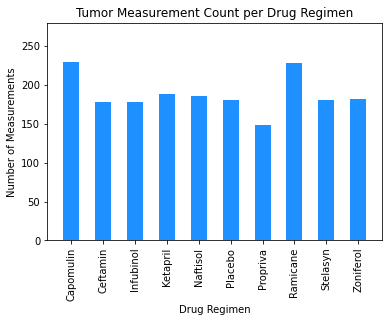

In [18]:
#Bar Plot for count of measurements per drug regimen (Numpy + Matplotlib)
# ref: https://datatofish.com/convert-pandas-dataframe-to-list/

drug_regimen_countdf = drug_regimen_countdf.rename(columns={"count":"Count of Measurements per Drug"})
measurement_count = drug_regimen_countdf["Count of Measurements per Drug"].values.tolist()
drug_regimens = np.arange(len(drug_regimen_countdf))

plt.bar(drug_regimens, measurement_count, color='dodgerblue', 
        align="center", width=0.5)

tick_locations = [drug for drug in drug_regimens]
drug_labels = drug_regimen_countdf.index.values.tolist()
plt.xticks(tick_locations, drug_labels, rotation=90)

xhandle="Count per Drug Regimen"

plt.xlim(-0.75, len(drug_regimens)-0.25)
plt.ylim(0, max(measurement_count)+50)
plt.title("Tumor Measurement Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()


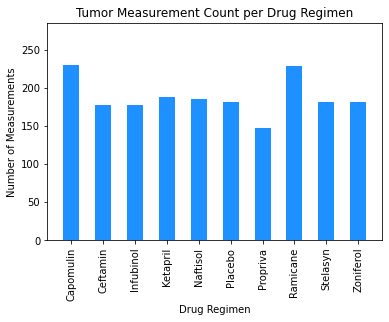

In [22]:
#Bar Plot for count of measurements per drug regimen using df.plot()
#ref: https://stackoverflow.com/questions/20865487/pandas-plot-without-a-legend
#ref: https://stackoverflow.com/questions/12056115/disable-the-output-of-matplotlib-pyplot
#ref: https://stackoverflow.com/questions/27425015/python-pandas-timeseries-plots-how-to-set-xlim-and-xticks-outside-ts-plot

drug_regimen_countdf = drug_regimen_countdf.rename(columns={"count":"Count of Measurements per Drug"})
measurement_count = drug_regimen_countdf["Count of Measurements per Drug"].values.tolist()
drug_regimens = np.arange(len(drug_regimen_countdf))

drug_barchart = drug_regimen_countdf.plot(kind='bar',  
                          ylim=[0, max(measurement_count)+55],
                         xlabel="Drug Regimen",
                         ylabel="Number of Measurements",
                         title="Tumor Measurement Count per Drug Regimen",
                         facecolor="dodgerblue",
                         legend=False)
margins = drug_barchart.set_xlim(-0.75, len(drug_regimens)-0.25)

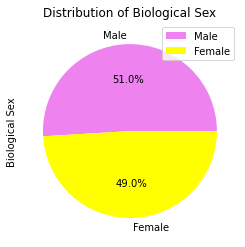

In [20]:
# Pie Plot for distribution of biological sexes in study (Numpy + Matplotlib)

# Labels, values, and colors for the sections of our pie chart
labels = ["Male", "Female"]
mice_count = clean_data["Sex"].value_counts()
portions = [mice_count["Male"], mice_count["Female"]]
colors = ["violet", "yellow"]

plt.pie(portions, labels=labels, colors=colors,
        autopct="%1.1f%%", radius=1)
plt.title("Distribution of Biological Sex")
plt.ylabel("Biological Sex")
plt.legend(loc='best')
plt.show()



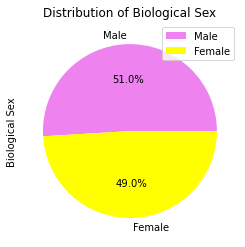

In [21]:
#Pie Plot for distribution of biological sex in study (df.plot())
#ref: https://kontext.tech/column/code-snippets/402/pandas-dataframe-plot-pie-chart
#ref: https://stackoverflow.com/questions/12056115/disable-the-output-of-matplotlib-pyplot

mice_countdf = pd.DataFrame(mice_count)
mice_countdf = mice_countdf.rename(columns={"Sex": "Biological Sex"})

mice_piechart = mice_countdf.plot(kind='pie', 
                  y="Biological Sex",
                  colors = ["violet", "yellow"],
                  fontsize=10, title="Distribution of Biological Sex",
                  autopct='%1.1f%%', figsize=(4,4)
                  )



In [241]:
# Calculating the final tumor volume of each mouse across four of the most promising treatment regimens
#ref: Worked with Tanmay Patel and Nicole Cruz for logic


#Filter the data to contain only the 4 drugs of interest specficied: Capomulin, Ramicane, Infubinol, Ceftamin
bestdrugregimensdf = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")| 
                                  (clean_data["Drug Regimen"] == "Ramicane")|
                                  (clean_data["Drug Regimen"] == "Infubinol")|
                                  (clean_data["Drug Regimen"] == "Ceftamin"), :]

final_tumorvolumesdf = bestdrugregimensdf.groupby(["Mouse ID"]).max()
final_tumorvolumesdf = final_tumorvolumesdf.drop(columns=["Age_months", "Weight (g)", "Tumor Volume (mm3)", "Metastatic Sites"])
final_tumorvolumesdf = final_tumorvolumesdf[["Drug Regimen", "Timepoint", "Sex"]]
final_tumorvolumesdf = final_tumorvolumesdf.reset_index()
final_tumorvolumesdf = final_tumorvolumesdf.merge(clean_data, on=["Mouse ID", "Drug Regimen", "Timepoint", "Sex"])
final_tumorvolumesdf = final_tumorvolumesdf[["Mouse ID", "Drug Regimen", "Sex", "Age_months", 
                                             "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"]]
final_tumorvolumesdf = final_tumorvolumesdf.rename(columns={"Tumor Volume (mm3)": "Final Tumor Volume (mm3)"})      
final_tumorvolumesdf.head(21)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Final Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
5,a520,Ramicane,Male,13,21,45,38.810366,1
6,a577,Infubinol,Female,6,25,30,57.031862,2
7,a644,Ramicane,Female,7,17,45,32.978522,1
8,a685,Infubinol,Male,8,30,45,66.083066,3
9,b128,Capomulin,Female,9,22,45,38.982878,2


The lower quartile of the final tumor volumes is: 37.187743802499995
The upper quartile of the final tumor volumes is: 59.930261755000004
The interquartile range of the final tumor volumes is: 22.74251795250001
The the median of the final tumor volumes is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.
---------------------------------------------
No outliers currently identified using metrics listed above.


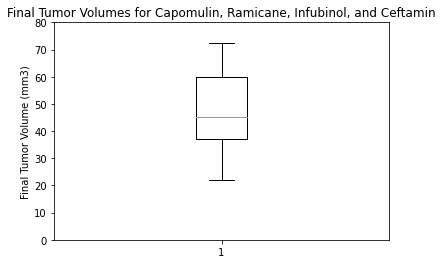

In [280]:
#Creating quartiles of the final tumor volumes and performing quantitaive analysis according to quartile information

final_tumor_volumes = final_tumorvolumesdf["Final Tumor Volume (mm3)"]

quartiles = final_tumor_volumes.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the final tumor volumes is: {lowerq}")
print(f"The upper quartile of the final tumor volumes is: {upperq}")
print(f"The interquartile range of the final tumor volumes is: {iqr}")
print(f"The the median of the final tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"---------------------------------------------")


outlier_list = []

for mouseID in final_tumorvolumesdf["Mouse ID"]: 
    
    outlier_search  = final_tumorvolumesdf.loc[final_tumorvolumesdf["Mouse ID"] == mouseID, ["Mouse ID","Final Tumor Volume (mm3)"]]
    outlier_tumorvolume = outlier_search["Final Tumor Volume (mm3)"].tolist()
    outlier_mouseID = outlier_search["Mouse ID"].tolist()
    
    if (outlier_tumorvolume > upper_bound) | (outlier_tumorvolume < lower_bound):
        
        print(f"The current analysis shows that mouse ID {outlier_mouseID[0]} is an outlier with a final tumor volume of {outlier_tumorvolume[0]}.")
        outlier_list.append(outlier_mouseID[0])


if(len(outlier_list) < 1):
    
    print(f"No outliers currently identified using metrics listed above.")
    
    
# Box and whisker adaptation of quantitative analysis performed above.
# ref: https://stackoverflow.com/questions/62118808/how-matplotlib-calculate-the-value-of-lower-and-upper-extreme-in-boxplot

# IMPORTANT NOTE: the "whiskers" in the graph below show the maximum and minimum values in the final_tumor volume dataset.
# Since no outliers were identified, the whiskers do not automatically generate at the upper and lower bounds of the quantile set. 
# Instead, they appear at the maximum and minimum vales in the 
# set that fall beneath and above the upper and lower bounds, respectively.

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes for Capomulin, Ramicane, Infubinol, and Ceftamin')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(final_tumor_volumes)
plt.ylim(0,80)
plt.show()
    
    

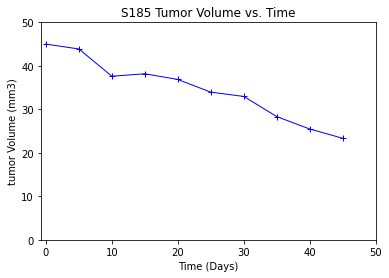

In [183]:
#Selecting mouse ID s185 for evaluation of tumor volume vs. time in Capomulin drug treatment

capomulin_mice = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", :]
capomulin_s185 = capomulin_mice.loc[capomulin_mice["Mouse ID"] == "s185", :]
capomulin_s185

x_values = np.arange(min(capomulin_s185["Timepoint"]), max(capomulin_s185["Timepoint"])+5, 5)
y_values = capomulin_s185["Tumor Volume (mm3)"].values.tolist()


tumorvol_s185 = plt.plot(x_values, y_values, marker="+",color="blue", linewidth=1, label="Mouse ID s185 Tumor Volume (mm3)")
xlabel = plt.xlabel("Time (Days)")
ylabel = plt.ylabel("tumor Volume (mm3)")
s185_xlim = plt.xlim(-0.75, max(x_values)+5)
s185_ylim = plt.ylim(0, max(y_values)+5)
s185_title = plt.title("S185 Tumor Volume vs. Time")
plt.show()

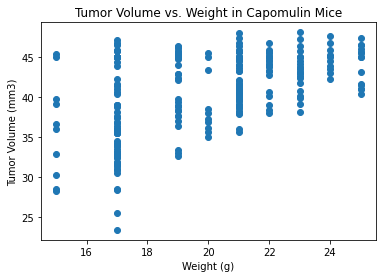

In [184]:
#Plotting tumor volume (mm3) vs. mouse weight (g) for mice treated with Capomulin
capomulin_tumor_volume = capomulin_mice["Tumor Volume (mm3)"]
capomulin_mouse_weight = capomulin_mice["Weight (g)"]
plt.scatter(capomulin_mouse_weight, capomulin_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Tumor Volume vs. Weight in Capomulin Mice")
plt.show()



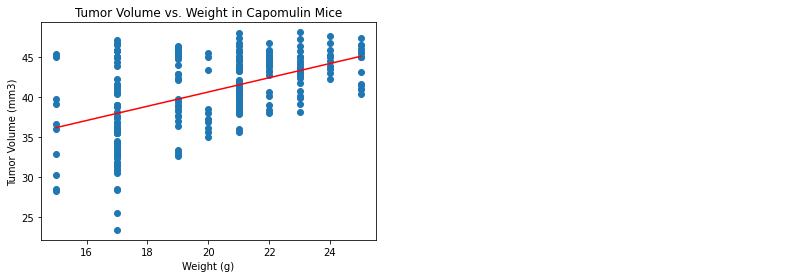

The r-squared is: 0.9034966277438606
The equation of the best fit line is: y = 0.89x + 22.76


In [206]:
# Calculating the average tumor volume for each mouse treated with Capomulin and creating a new dataframe 
# with the average tumor volume, mouseID, and weight in preparation for linear regression analysis

capomulin_mean_tumorvolbyweight = capomulin_mice.groupby(["Weight (g)"]).mean()
capomulin_mean_tumorvolbyweight = capomulin_mean_tumorvolbyweight.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume (mm3)"})
capomulin_mean_tumorvolbyweight = capomulin_mean_tumorvolbyweight.drop(columns={"Age_months", "Timepoint", "Metastatic Sites"})
capomulin_mean_tumorvolbyweight = capomulin_mean_tumorvolbyweight.reset_index()
capomulin_mean_tumorvolbyweight


#Setting up linear regression using the weight and the average tumor volume by weight
y_values = capomulin_mean_tumorvolbyweight["Mean Tumor Volume (mm3)"]
x_values = capomulin_mean_tumorvolbyweight["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Applying linear regression values to previous scatter plot
plt.scatter(capomulin_mouse_weight, capomulin_tumor_volume)
plt.title("Tumor Volume vs. Weight in Capomulin Mice")
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(35,22),fontsize=15, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

#Presenting correlation coefficient and linear regression equation
print(f"The r-squared is: {rvalue**2}")
print(f"The equation of the best fit line is: {line_eq}")